In [1]:
from sympy import *
init_printing()
import numpy as num

Hay que tratar de estimar establecer cuando vale que
$$\frac{1}{n}\sum_{j=1}^{n-1}\frac{1}{\sin\left(\frac{j\pi}{n}\right)}< 4.$$
Vamos a tratar de usar la forma de suma de Riemann del miembro izquierdo. Vamos a suponer primero que $n=2k$ es par.

$$ \sum_{j=1}^{2k-1}\frac{1}{\sin\left(\frac{j\pi}{2k}\right)}= \sum_{j=1}^{k-1}\frac{1}{\sin\left(\frac{j\pi}{2k}\right)}+1 +\sum_{j=k+1}^{2k-1}\frac{1}{\sin\left(\frac{j\pi}{2k}\right)}$$

Ahora 
$$ \sin\left(\frac{(k-j)\pi}{2k}\right)=\sin\left(\frac{(k+j)\pi}{2k}\right)=\cos\left(\frac{j\pi}{2k}\right).$$
Luego
$$\sum_{j=1}^{2k-1}\frac{1}{\sin\left(\frac{j\pi}{2k}\right)} = 2 \sum_{j=1}^{k-1}\frac{1}{\cos\left(\frac{j\pi}{2k}\right)}+1$$

Entonces
$$\frac{1}{2k} \sum_{j=1}^{2k-1}\frac{1}{\sin\left(\frac{j\pi}{2k}\right)}<4 \iff \frac{1}{k}\sum_{j=1}^{k-1}\frac{1}{\cos\left(\frac{j\pi}{2k}\right)}+\frac{1}
{2k}<4\tag{ 1}$$
 


Necesitamos la primitiva de $1/cos(x)$ 


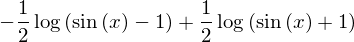

In [2]:
x=symbols('x')
integrate(1/cos(x),x)

No pone los módulos que llevan los logarítmos. La primitiva en $[0,\frac{\pi}{2})$ es
$$f(x)=\log\sqrt{\frac{1+sin(x)}{1-\sin(x)}   }$$
Luego, pensando en la suma de Riemann con una partición equi-espaciada con $\delta x=\frac{\pi}{2k}$ del intervalo $\left[\left. 0,\frac{\pi}{2 }\frac{(k-1)}{k} \right)\right.$ y como $1/\cos x$ es creciente.
$$ f\left(\frac{\pi}{2 }\frac{(k-1)}{k}  \right)=
\int_0^{\frac{\pi}{2 }\frac{(k-1)}{k} }\frac{dx}{\cos x}
\leq \frac{\pi}{2k}\sum_{j=1}^{k-1}\frac{1}{\cos\left(\frac{j\pi}{2k}\right)} $$

Luego la condición (1) no se satisface cuando 

$$4\leq \frac{2}{\pi}f\left(\frac{\pi}{2 }\frac{(k-1)}{k}  \right) +\frac{1}{2k}\iff 4\leq \frac{2}{\pi}f\left(x \right)+\frac12-\frac{x}{\pi},\quad\text{ donde}\quad x=\frac{\pi}{2 }\frac{(k-1)}{k}   $$

o lo que es lo mismo

$$ 3.5\pi <2f(x)-x$$

Ahora $g(x)=2f(x)-x$ tiene derivada $-1+2/cos(x)$ que es positiva en $[0,\pi/2)$ luego $g(x)$ es creciente. Como $x$ es creciente respecto a $k$, tenemos $2f\left(x \right)-x$ creciente respecto a $k$. De modo que si encontramos un valor de $k_0$ tal que  $3.5\pi\leq 2f\left(x \right)-x$, lo mismo ocurrirá para todos los $k\geq k_0$ y habremos establecido que la condición (1) no ocurre para ninguno de ellos. 

Hagamos ese cálculo con numpy.


In [3]:
def f(k):
    x=num.pi/2*(k-1)/k
    return 2*log(sqrt((1+sin(x))/(1-sin(x))))-x-3.5*num.pi
f(420)



Si tomamos $k=420$ ya nos da $2f(x)-x>3.5\pi$. Este $k$ corresponde a  $n=2k=840$. Que es mucho más grande que el valor hipotético de 472. Pero no importa, ya sabemos que para $k\geq 840$ ninguno la cumple. solo resta ver de los finitos $1\leq k\leq 840$ cuales la cumplen.

In [4]:
def suma(k):
    return sum([1/num.sin(j*num.pi/k) for j in range(1,k)])/k-4

In [5]:
L=[suma(k) for k in range(1,840)]

In [6]:
import matplotlib.pyplot as plt

/home/fernando/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
plt.plot(range(1,840),L)
plt.show()

In [8]:
L[470:475]

Faltaría el caso $n$ impar